# Pattern Recognition Project on Gesture Phase Segmentation

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("./Data/a1_raw.csv" , skiprows=[1,2,3,4])
df2=pd.read_csv("./Data/a1_va3.csv")
df3=pd.read_csv("./Data/a2_raw.csv" , skiprows=[1,2,3,4])
df4=pd.read_csv("./Data/a2_va3.csv")
df5=pd.read_csv("./Data/a3_raw.csv" , skiprows=[1,2,3,4])
df6=pd.read_csv("./Data/a3_va3.csv")

df7=pd.read_csv("./Data/b1_raw.csv" , skiprows=[1,2,3,4])
df8=pd.read_csv("./Data/b1_va3.csv")
df9=pd.read_csv("./Data/b3_raw.csv" , skiprows=[1,2,3,4])
df10=pd.read_csv("./Data/b3_va3.csv")

df11=pd.read_csv("./Data/c1_raw.csv" , skiprows=[1,2,3,4])
df12=pd.read_csv("./Data/c1_va3.csv")
df13=pd.read_csv("./Data/c3_raw.csv" , skiprows=[1,2,3,4])
df14=pd.read_csv("./Data/c3_va3.csv")

In [3]:
df1.drop('timestamp',axis=1,inplace=True)
df1.drop('phase',axis=1,inplace=True)
df3.drop('timestamp',axis=1,inplace=True)
df3.drop('phase',axis=1,inplace=True)
df5.drop('timestamp',axis=1,inplace=True)
df5.drop('phase',axis=1,inplace=True)
df7.drop('timestamp',axis=1,inplace=True)
df7.drop('phase',axis=1,inplace=True)
df9.drop('timestamp',axis=1,inplace=True)
df9.drop('phase',axis=1,inplace=True)
df11.drop('timestamp',axis=1,inplace=True)
df11.drop('phase',axis=1,inplace=True)
df13.drop('timestamp',axis=1,inplace=True)
df13.drop('phase',axis=1,inplace=True)

In [4]:
p1 = pd.concat([df1,df2],axis=1)
p2 = pd.concat([df3,df4],axis=1)
p3 = pd.concat([df5,df6],axis=1)
p4 = pd.concat([df7,df8],axis=1)
p5 = pd.concat([df9,df10],axis=1)
p6 = pd.concat([df11,df12],axis=1)
p7 = pd.concat([df13,df14],axis=1)

In [5]:
df= pd.concat([p1,p2,p3,p4,p5,p6,p7])

In [6]:
df.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,24,25,26,27,28,29,30,31,32,Phase
0,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,...,1.880800e-04,0.005133,0.010400,0.000646,0.007871,0.004631,0.000963,0.000092,0.000438,D
1,5.064488,4.290401,1.542146,4.955739,4.163175,1.511876,5.037724,1.618397,1.779722,5.045395,...,-7.500000e-07,0.005093,0.005756,0.000573,0.003459,0.000730,0.000332,0.000012,0.000433,D
2,5.067825,4.290883,1.542058,4.928284,4.157637,1.511306,5.038332,1.618043,1.780080,5.045374,...,-3.920000e-05,0.002406,0.003279,0.000452,0.003261,0.002412,0.000852,0.000042,0.000202,D
3,5.070332,4.290677,1.541985,4.916637,4.151067,1.510510,5.038742,1.618044,1.780114,5.045767,...,-3.184000e-05,0.001416,0.001334,0.000493,0.001358,0.000313,0.000611,0.000029,0.000596,D
4,5.071611,4.290927,1.542046,4.906132,4.143034,1.509449,5.042224,1.618561,1.780209,5.047422,...,-2.015000e-05,0.000158,0.001709,0.000325,0.001713,0.000203,0.000069,0.000038,0.000069,D


In [7]:
df.isna().sum().head()

lhx    0
lhy    0
lhz    0
rhx    0
rhy    0
dtype: int64

In [8]:
df.dtypes.head()

lhx    float64
lhy    float64
lhz    float64
rhx    float64
rhy    float64
dtype: object

In [9]:
print(df.shape)

(9873, 51)


In [10]:
df.Phase.unique()

array(['D', 'P', 'S', 'H', 'R'], dtype=object)

In [11]:
df = df.set_index("Phase")
df = df.drop(['P', 'D', 'R'], axis=0)

In [12]:
df.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,23,24,25,26,27,28,29,30,31,32
Phase,,,,,,,,,,,,,,,,,,,,,
S,5.096925,2.944271,1.468542,4.497191,3.282783,1.486971,5.052908,1.611426,1.766621,5.066699,...,-0.001379,-0.000094,0.020988,0.010354,0.016217,0.010435,0.004264,0.001580,0.003233,0.001581
S,5.104311,2.977685,1.468042,4.571614,3.147557,1.472319,5.051867,1.607633,1.766425,5.067700,...,-0.000320,0.000211,0.019476,0.003480,0.015015,0.003467,0.000600,0.003637,0.000472,0.003643
S,5.003324,3.062721,1.465710,4.580294,3.163301,1.470020,5.049946,1.605049,1.766622,5.071926,...,-0.000588,0.000017,0.013344,0.001848,0.010395,0.001814,0.001926,0.000595,0.001460,0.000595
S,5.000243,3.087687,1.461833,4.587502,3.205599,1.463568,5.048331,1.605076,1.767081,5.071769,...,0.000594,0.000180,0.007175,0.004686,0.005124,0.004668,0.006609,0.000916,0.004991,0.000921
S,5.001687,3.138095,1.452445,4.596392,3.233689,1.456821,5.046865,1.607460,1.767541,5.073685,...,-0.002091,-0.000095,0.007819,0.003604,0.005717,0.003606,0.000238,0.002267,0.000224,0.002265


In [13]:
df = df.reset_index()

In [14]:
df.Phase.unique()

array(['S', 'H'], dtype=object)

<AxesSubplot:>

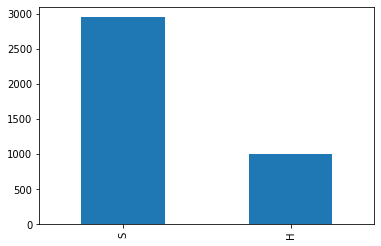

In [15]:
df['Phase'].value_counts().plot(kind='bar')

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Phase'] = le.fit_transform(df['Phase'])

In [17]:
df.Phase.unique()

array([1, 0])

In [18]:
df = df.sample(frac=1)

In [19]:
df.head()

,Phase,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,...,23,24,25,26,27,28,29,30,31,32
2007,0,0.000000,4.234729,2.248383,5.305727,4.482615,2.032810,2.853291,1.311049,2.218286,...,0.000098,-0.000010,0.006382,0.005109,0.005372,0.003672,0.000244,0.000321,0.000299,0.000199
914,1,5.590650,3.580621,1.505555,5.132256,3.753911,1.515392,5.385164,1.503469,1.759198,...,0.000935,0.000195,0.005297,0.005807,0.008692,0.003954,0.001145,0.004088,0.003241,0.003820
1710,1,1.589827,4.258135,2.187540,3.496432,2.566168,2.250762,2.499752,0.910509,2.398813,...,-0.002020,-0.000197,0.013851,0.024665,0.008384,0.017164,0.000125,0.001325,0.000192,0.002032
682,1,4.682050,3.205074,1.439096,5.578133,4.576180,1.409845,5.047847,1.650826,1.734878,...,0.001664,-0.000964,0.029428,0.022027,0.019736,0.017267,0.006766,0.004650,0.001022,0.003947
434,1,5.838452,3.133103,1.498424,5.169382,2.461226,1.471143,5.026292,1.635306,1.765648,...,0.002978,-0.000393,0.009353,0.006440,0.009340,0.006417,0.008363,0.003668,0.008379,0.003681


### Correlation Matrix

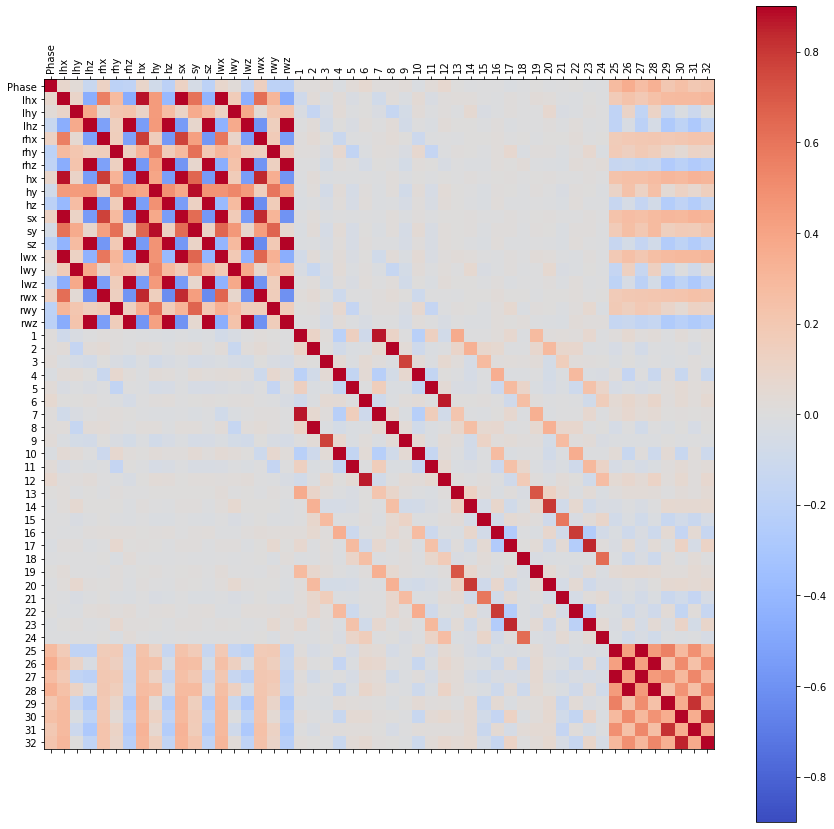

In [20]:
corr = df.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-0.9, vmax=0.9)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### Extracting the Feautre & Label Vector 

In [21]:
cols = list(df.columns)
features = cols
features = [e for e in features if e not in {'Phase', 'X27', 'X28', 'X4', 'X5', 'X8'}]

In [22]:
len(features)

50

In [23]:
X = df[features]
y = df['Phase']
X.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,23,24,25,26,27,28,29,30,31,32
2007,0.000000,4.234729,2.248383,5.305727,4.482615,2.032810,2.853291,1.311049,2.218286,2.698829,...,0.000098,-0.000010,0.006382,0.005109,0.005372,0.003672,0.000244,0.000321,0.000299,0.000199
914,5.590650,3.580621,1.505555,5.132256,3.753911,1.515392,5.385164,1.503469,1.759198,5.480761,...,0.000935,0.000195,0.005297,0.005807,0.008692,0.003954,0.001145,0.004088,0.003241,0.003820
1710,1.589827,4.258135,2.187540,3.496432,2.566168,2.250762,2.499752,0.910509,2.398813,2.484079,...,-0.002020,-0.000197,0.013851,0.024665,0.008384,0.017164,0.000125,0.001325,0.000192,0.002032
682,4.682050,3.205074,1.439096,5.578133,4.576180,1.409845,5.047847,1.650826,1.734878,5.097409,...,0.001664,-0.000964,0.029428,0.022027,0.019736,0.017267,0.006766,0.004650,0.001022,0.003947
434,5.838452,3.133103,1.498424,5.169382,2.461226,1.471143,5.026292,1.635306,1.765648,5.008089,...,0.002978,-0.000393,0.009353,0.006440,0.009340,0.006417,0.008363,0.003668,0.008379,0.003681


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Normalization

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X = StandardScaler().fit_transform(X)
X.shape

(3948, 50)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2961, 50) (2961,)
(987, 50) (987,)


### Principal Component Analsysis

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
pca.fit(X_train)

PCA(n_components=27)

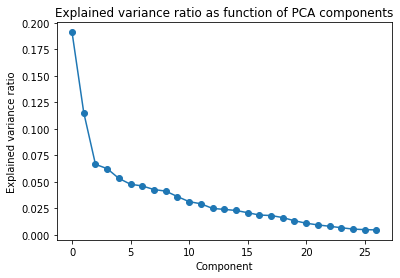

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

### Create 'reduced_data' - a Feature Dataframe containing PCA components explaining Maximum Variance

In [31]:
pca = PCA(n_components=17)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
X_train.shape

(2961, 17)

# Support Vector Machines

In [35]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

scores = cross_val_score(SVM, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.87858347 0.86655405 0.8902027  0.88344595 0.86824324]
0.8774058839615332


In [36]:
from time import time
from sklearn.metrics import accuracy_score

y_pred = SVM.predict(X_test)
tt0=time()

print ("cross result========")
print ("Acurracy: ", SVM.score(X_test,y_test) )

tt1=time()
print ("time elapsed: ", tt1-tt0)
print ("\n")

cross result========
Acurracy:  0.889564336372847
time elapsed:  0.04047107696533203




In [37]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 50], 'kernel': ['linear']},
              {'C': [1, 10, 50], 'kernel': ['rbf'], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09,0.1, 0.15, 0.2, 0.3]}]

grid_search = GridSearchCV(estimator = SVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 50, 'gamma': 0.15, 'kernel': 'rbf'}


In [39]:
SVM = SVC(kernel = 'rbf', C=50, gamma=0.15)
SVM.fit(X_train, y_train)
scores = cross_val_score(SVM, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.93929174 0.93918919 0.95101351 0.92398649 0.94256757]
0.9392096987375232


<AxesSubplot:>

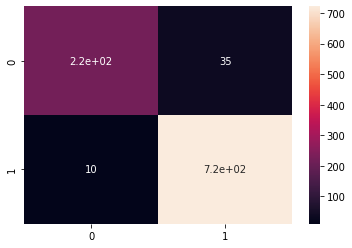

In [40]:
y_pred = SVM.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sbn

matrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(matrix, annot=True)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       255
           1       0.95      0.99      0.97       732

    accuracy                           0.95       987
   macro avg       0.96      0.92      0.94       987
weighted avg       0.95      0.95      0.95       987



In [42]:
print("Acurracy: ", SVM.score(X_test,y_test))

Acurracy:  0.9544072948328267


# Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(X_train, y_train)

scores = cross_val_score(rf, X_train, y_train, cv=5)
print (scores)
print (scores.mean())

[0.89713322 0.91722973 0.93581081 0.91554054 0.91385135]
0.9159131306686114


In [44]:
from time import time
from sklearn.metrics import accuracy_score

tt0=time()
print("cross result=======")
print ("Acurracy: ", rf.score(X_test,y_test))
tt1=time()
print("time elapsed: ", tt1-tt0)
print("\n")

cross result=======
Acurracy:  0.9240121580547113
time elapsed:  0.007946491241455078




In [45]:
parameters = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}


In [47]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', bootstrap = False)
rf.fit(X_train, y_train)

scores = cross_val_score(rf, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.91905565 0.93243243 0.94087838 0.91722973 0.93412162]
0.9287435622806619


<AxesSubplot:>

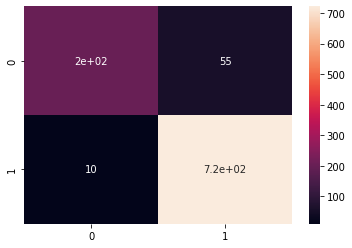

In [48]:
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sbn

matrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(matrix, annot=True)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       255
           1       0.93      0.99      0.96       732

    accuracy                           0.93       987
   macro avg       0.94      0.89      0.91       987
weighted avg       0.94      0.93      0.93       987



In [50]:
print ("Acurracy: ", rf.score(X_test,y_test))

Acurracy:  0.9341438703140831


# Artificial Neural Networks

In [51]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

def create_network():
    
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation='relu', input_dim = 17))
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=1, activation='sigmoid'))
    network.compile(loss='binary_crossentropy', 
                    optimizer='rmsprop', 
                    metrics=['accuracy'])
    return network

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=64, 
                                 batch_size=16)

In [52]:
history = neural_network.fit(X_train, y_train, validation_data=(X_test,y_test))
neural_network.model.summary()

Epoch 1/64
186/186 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7062 - val_loss: 0.4006 - val_accuracy: 0.8338
Epoch 2/64
186/186 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8423 - val_loss: 0.3341 - val_accuracy: 0.8642
Epoch 3/64
186/186 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8571 - val_loss: 0.3143 - val_accuracy: 0.8754
Epoch 4/64
186/186 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8615 - val_loss: 0.3079 - val_accuracy: 0.8774
Epoch 5/64
186/186 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8666 - val_loss: 0.3023 - val_accuracy: 0.8784
Epoch 6/64
186/186 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8700 - val_loss: 0.2960 - val_accuracy: 0.8784
Epoch 7/64
186/186 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8754 - val_loss: 0.2943 - val_accuracy: 0.8774
Epoch 

186/186 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9362 - val_loss: 0.2975 - val_accuracy: 0.9017
Epoch 59/64
186/186 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9352 - val_loss: 0.3055 - val_accuracy: 0.9027
Epoch 60/64
186/186 [==============================] - 0s 1ms/step - loss: 0.1599 - accuracy: 0.9368 - val_loss: 0.3009 - val_accuracy: 0.8987
Epoch 61/64
186/186 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9385 - val_loss: 0.2980 - val_accuracy: 0.9017
Epoch 62/64
186/186 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9389 - val_loss: 0.3179 - val_accuracy: 0.9078
Epoch 63/64
186/186 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9389 - val_loss: 0.3044 - val_accuracy: 0.8967
Epoch 64/64
186/186 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9402 - val_loss: 0.3002 - val_accuracy: 0.9048
Model: "seq

In [53]:
score=cross_val_score(neural_network, X_train, y_train, cv=3)
print(score)
print(score.mean())

Epoch 1/64
124/124 [==============================] - 1s 1ms/step - loss: 0.5113 - accuracy: 0.7285
Epoch 2/64
124/124 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8151
Epoch 3/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8495
Epoch 4/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8526
Epoch 5/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8622
Epoch 6/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8622
Epoch 7/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8728
Epoch 8/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8774
Epoch 9/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8794
Epoch 10/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8754

124/124 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8794
Epoch 18/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8830
Epoch 19/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8825
Epoch 20/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8850
Epoch 21/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 0.8880
Epoch 22/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8875
Epoch 23/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.8901
Epoch 24/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.8916
Epoch 25/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8896
Epoch 26/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.8936
Ep

124/124 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9144
Epoch 34/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9154
Epoch 35/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2007 - accuracy: 0.9189
Epoch 36/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9184
Epoch 37/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9195
Epoch 38/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9200
Epoch 39/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1922 - accuracy: 0.9220
Epoch 40/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1875 - accuracy: 0.9230
Epoch 41/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9240
Epoch 42/64
124/124 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.9255
Ep

<AxesSubplot:>

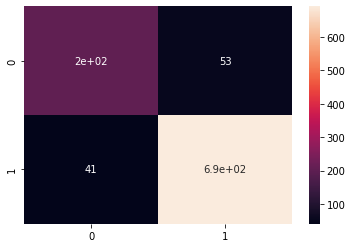

In [54]:
y_pred = neural_network.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sbn

matrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(matrix, annot=True)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       255
           1       0.93      0.94      0.94       732

    accuracy                           0.90       987
   macro avg       0.88      0.87      0.87       987
weighted avg       0.90      0.90      0.90       987



In [56]:
test_accuracy = neural_network.score(X_test, y_test)
test_accuracy

62/62 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.9048


0.9047619104385376

In [57]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

def create_network( optimizer):
    
    network = models.Sequential()
    network.add(layers.Dense(units=16,kernel_initializer="uniform", activation='relu', input_dim = 17))
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=1, activation='sigmoid'))
    network.compile(loss='binary_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])
    
    return network

neural_network = KerasClassifier(build_fn=create_network)

optimizers = ['adam', 'rmsprop']
epochs = [10,20]
batches = [2, 4]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=neural_network, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
987/987 [==============================] - 1s 1ms/step - loss: 0.4095 - accuracy: 0.8105
Epoch 2/10
987/987 [==============================] - 1s 1ms/step - loss: 0.3185 - accuracy: 0.8658
Epoch 3/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2992 - accuracy: 0.8734
Epoch 4/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2753 - accuracy: 0.8820
Epoch 5/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.8820
Epoch 6/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2455 - accuracy: 0.8916
Epoch 7/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2403 - accuracy: 0.8916
Epoch 8/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2301 - accuracy: 0.8977
Epoch 9/10
987/987 [==============================] - 1s 1ms/step - loss: 0.2220 - accuracy: 0.9012
Epoch 10/10
494/494 [==============================] - 0s 789us/step - loss: 0.2821 - accuracy: 0.89

987/987 [==============================] - 1s 923us/step - loss: 0.1690 - accuracy: 0.9286
Epoch 17/20
987/987 [==============================] - 1s 905us/step - loss: 0.1650 - accuracy: 0.9316
Epoch 18/20
987/987 [==============================] - 1s 919us/step - loss: 0.1562 - accuracy: 0.9377
Epoch 19/20
987/987 [==============================] - 1s 898us/step - loss: 0.1561 - accuracy: 0.9331
Epoch 20/20
494/494 [==============================] - 0s 726us/step - loss: 0.3341 - accuracy: 0.8967
Epoch 1/20
987/987 [==============================] - 1s 984us/step - loss: 0.4245 - accuracy: 0.8009
Epoch 2/20
987/987 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8637
Epoch 3/20
987/987 [==============================] - 1s 1ms/step - loss: 0.3080 - accuracy: 0.8708
Epoch 4/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2994 - accuracy: 0.8678
Epoch 5/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2885 - accuracy: 0.

987/987 [==============================] - 1s 951us/step - loss: 0.2978 - accuracy: 0.8870
Epoch 13/20
987/987 [==============================] - 1s 979us/step - loss: 0.2908 - accuracy: 0.8921
Epoch 14/20
987/987 [==============================] - 1s 985us/step - loss: 0.2883 - accuracy: 0.8911
Epoch 15/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2898 - accuracy: 0.8946
Epoch 16/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2838 - accuracy: 0.8906
Epoch 17/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2849 - accuracy: 0.8961
Epoch 18/20
987/987 [==============================] - 1s 970us/step - loss: 0.2773 - accuracy: 0.8911
Epoch 19/20
987/987 [==============================] - 1s 959us/step - loss: 0.2835 - accuracy: 0.8956
Epoch 20/20
494/494 [==============================] - 1s 799us/step - loss: 0.3141 - accuracy: 0.8875
Epoch 1/20
987/987 [==============================] - 1s 966us/step - loss: 0.4272 - accura

494/494 [==============================] - 0s 924us/step - loss: 0.2932 - accuracy: 0.8739
Epoch 8/10
494/494 [==============================] - 1s 1ms/step - loss: 0.2874 - accuracy: 0.8794
Epoch 9/10
494/494 [==============================] - 0s 977us/step - loss: 0.2851 - accuracy: 0.8845
Epoch 10/10
247/247 [==============================] - 0s 731us/step - loss: 0.3099 - accuracy: 0.8754
Epoch 1/10
494/494 [==============================] - 1s 945us/step - loss: 0.4551 - accuracy: 0.8110
Epoch 2/10
494/494 [==============================] - 0s 900us/step - loss: 0.3323 - accuracy: 0.8642
Epoch 3/10
494/494 [==============================] - 0s 930us/step - loss: 0.3148 - accuracy: 0.8647
Epoch 4/10
494/494 [==============================] - 0s 958us/step - loss: 0.3022 - accuracy: 0.8774
Epoch 5/10
494/494 [==============================] - 0s 959us/step - loss: 0.2947 - accuracy: 0.8764
Epoch 6/10
494/494 [==============================] - 0s 930us/step - loss: 0.2911 - accuracy:

494/494 [==============================] - 0s 985us/step - loss: 0.3200 - accuracy: 0.8668
Epoch 4/20
494/494 [==============================] - ETA: 0s - loss: 0.3096 - accuracy: 0.86 - 0s 978us/step - loss: 0.3114 - accuracy: 0.8637
Epoch 5/20
494/494 [==============================] - 1s 1ms/step - loss: 0.3033 - accuracy: 0.8739
Epoch 6/20
494/494 [==============================] - 1s 1ms/step - loss: 0.2975 - accuracy: 0.8759
Epoch 7/20
494/494 [==============================] - 0s 973us/step - loss: 0.2890 - accuracy: 0.8713
Epoch 8/20
494/494 [==============================] - 1s 1ms/step - loss: 0.2805 - accuracy: 0.8744
Epoch 9/20
494/494 [==============================] - 1s 1ms/step - loss: 0.2739 - accuracy: 0.8794
Epoch 10/20
494/494 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.8860
Epoch 11/20
494/494 [==============================] - 1s 1ms/step - loss: 0.2610 - accuracy: 0.8886
Epoch 12/20
494/494 [==============================] - 1s 1ms

1481/1481 [==============================] - 1s 1ms/step - loss: 0.1767 - accuracy: 0.9200


In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.896319 using {'batch_size': 2, 'epochs': 20, 'optimizer': 'adam'}
0.884161 (0.006687) with: {'batch_size': 2, 'epochs': 10, 'optimizer': 'adam'}
0.870314 (0.009753) with: {'batch_size': 2, 'epochs': 10, 'optimizer': 'rmsprop'}
0.896319 (0.005382) with: {'batch_size': 2, 'epochs': 20, 'optimizer': 'adam'}
0.886187 (0.002659) with: {'batch_size': 2, 'epochs': 20, 'optimizer': 'rmsprop'}
0.879433 (0.003606) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'adam'}
0.874029 (0.004245) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'rmsprop'}
0.891591 (0.002983) with: {'batch_size': 4, 'epochs': 20, 'optimizer': 'adam'}
0.878757 (0.011413) with: {'batch_size': 4, 'epochs': 20, 'optimizer': 'rmsprop'}


In [60]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

def create_network():
    
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation='relu', input_dim = 17))
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=1, activation='sigmoid'))
    network.compile(loss='binary_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy']) 
    
    return network

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=20, 
                                 batch_size=2)

In [61]:
neural_network.fit(X_train, y_train)
neural_network.model.summary()

Epoch 1/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.4087 - accuracy: 0.7994
Epoch 2/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.3367 - accuracy: 0.8696
Epoch 3/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.8683
Epoch 4/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.2856 - accuracy: 0.8794
Epoch 5/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.2689 - accuracy: 0.8845
Epoch 6/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.2546 - accuracy: 0.8909
Epoch 7/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.2416 - accuracy: 0.8960
Epoch 8/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.2305 - accuracy: 0.9014
Epoch 9/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.2241 - accuracy: 0.9037
Epoch 10/20
1481/1481 [==============================] - 2s 1ms/step - loss: 0.214

In [62]:
score=cross_val_score(neural_network, X_train, y_train, cv=3)
print(score)
print(score.mean())

Epoch 1/20
987/987 [==============================] - 2s 1ms/step - loss: 0.4426 - accuracy: 0.7898
Epoch 2/20
987/987 [==============================] - 1s 1ms/step - loss: 0.3607 - accuracy: 0.8516
Epoch 3/20
987/987 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8607
Epoch 4/20
987/987 [==============================] - 1s 1ms/step - loss: 0.3012 - accuracy: 0.8734
Epoch 5/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2809 - accuracy: 0.8779
Epoch 6/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2614 - accuracy: 0.8865
Epoch 7/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2507 - accuracy: 0.8891
Epoch 8/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2385 - accuracy: 0.8936: 0s - loss: 0.2310 - 
Epoch 9/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2270 - accuracy: 0.9007
Epoch 10/20
987/987 [==============================] - 1s 1ms/step - loss: 0.2

<AxesSubplot:>

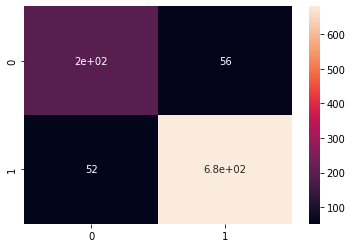

In [63]:
y_pred = neural_network.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sbn

matrix = confusion_matrix(y_test, y_pred)
sbn.heatmap(matrix, annot=True)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       255
           1       0.92      0.93      0.93       732

    accuracy                           0.89       987
   macro avg       0.86      0.85      0.86       987
weighted avg       0.89      0.89      0.89       987



In [65]:
test_accuracy = neural_network.score(X_test, y_test)
test_accuracy

494/494 [==============================] - 1s 947us/step - loss: 0.2939 - accuracy: 0.8906


0.890577495098114